# Deep Learning CNN Assignment
Muhammad Alfi Ramadhan
21/472839/PA/20345

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import keras
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model

In [ ]:
#load CIFAR dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#normalize pixel values to [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
len(train_images) + len(test_images)

60000

#Data Visualization

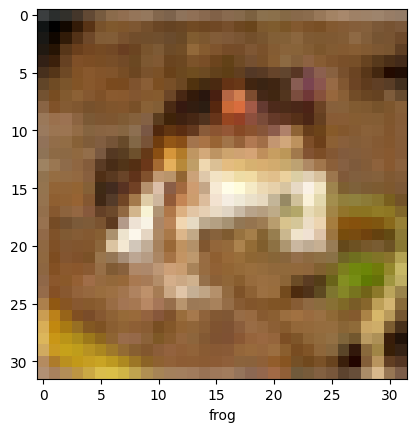

In [ ]:
#looking at 1 image
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[0][0]])
plt.show()

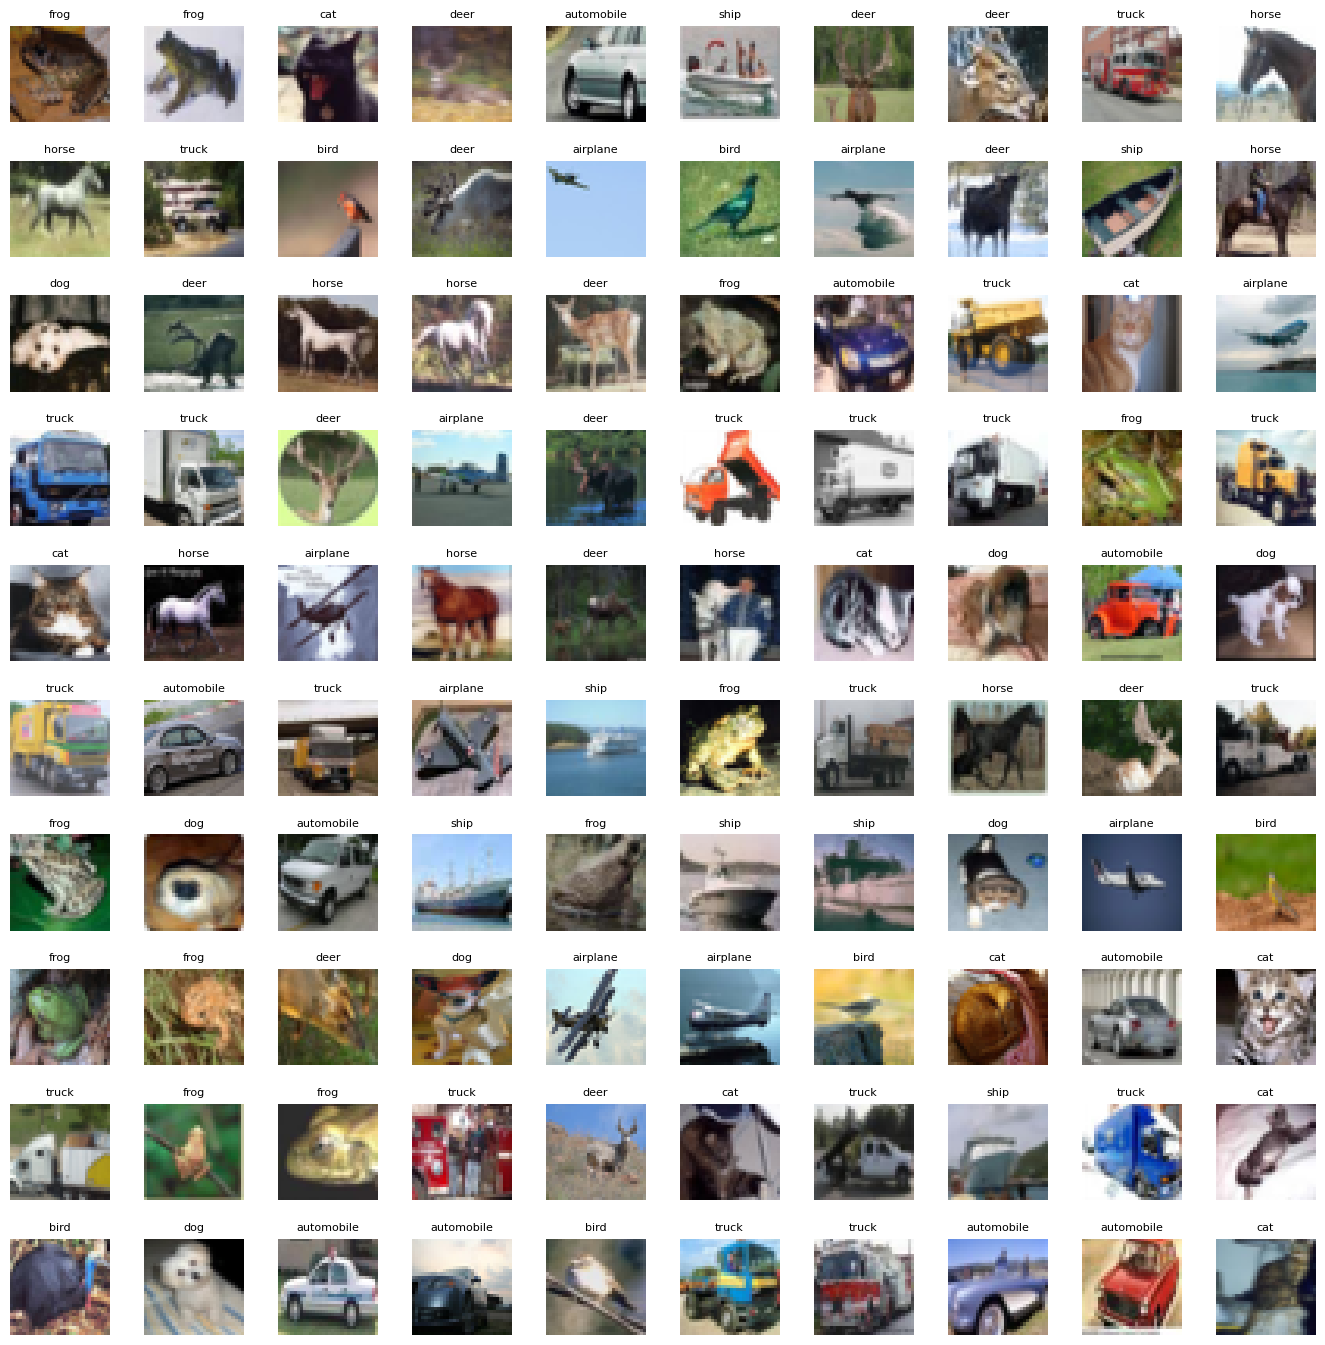

In [ ]:
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(train_images[index,1:])
    label_index = int(train_labels[index])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
# Transform target variable into one-hot encoding
labels_cat_train = to_categorical(train_labels, 10)
labels_cat_test = to_categorical(test_labels, 10)

#Modeling

In [ ]:
model = models.Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Pooling layer
model.add(layers.MaxPooling2D((2, 2)))
# Dropout layer
model.add(layers.Dropout(0.25))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Flattening the convolutions
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))

# Output layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

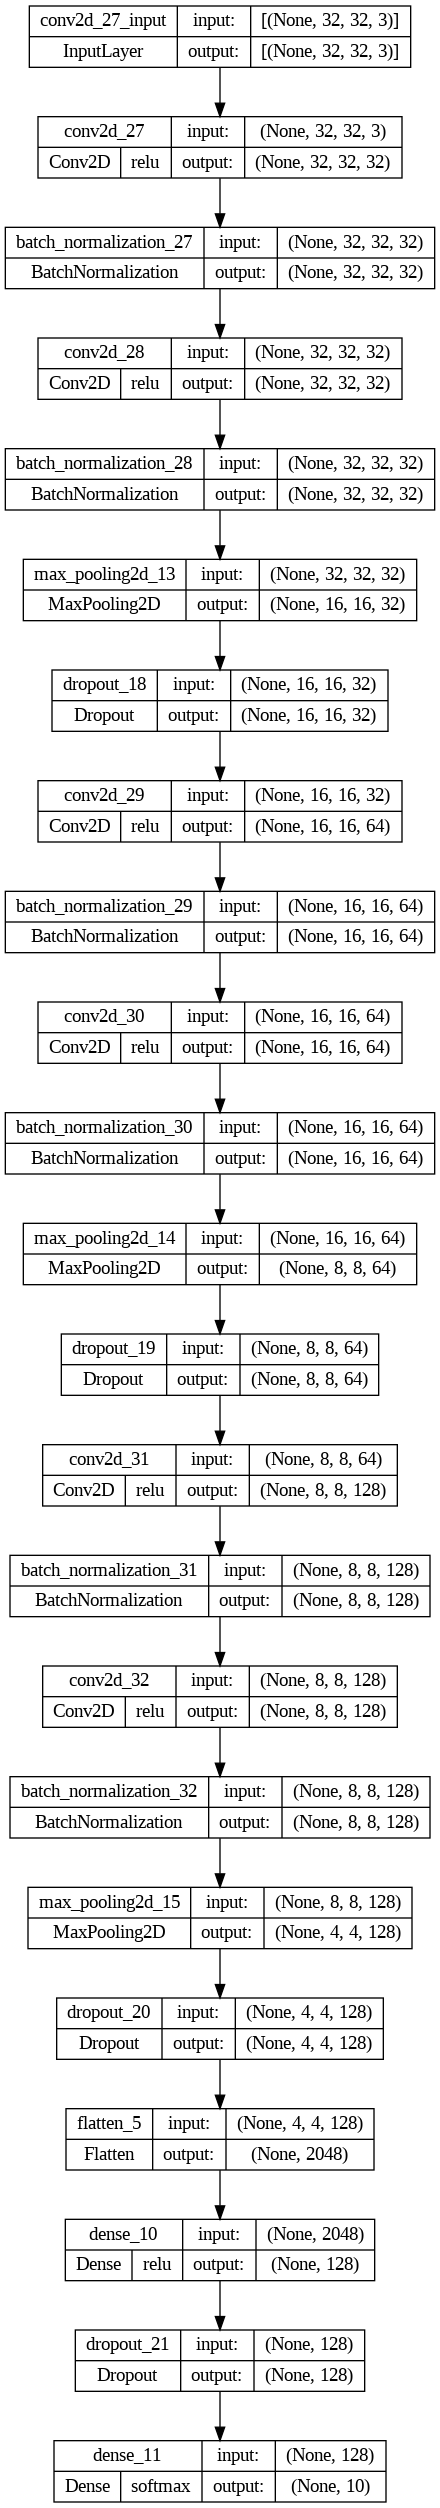

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False
)

# Training

Early stopping

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Compile

In [ ]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

Data Augmentation

In [ ]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(train_images, labels_cat_train, batch_size)
steps_per_epoch = train_images.shape[0] // batch_size

In [ ]:
history = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(test_images, labels_cat_test),
              callbacks=[early_stopping_callback],
              batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 56s 30ms/step - loss: 1.6295 - accuracy: 0.4063 - val_loss: 1.3165 - val_accuracy: 0.5327
Epoch 2/50
1562/1562 [==============================] - 46s 29ms/step - loss: 1.2325 - accuracy: 0.5643 - val_loss: 1.0643 - val_accuracy: 0.6166
Epoch 3/50
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0400 - accuracy: 0.6381 - val_loss: 1.0047 - val_accuracy: 0.6570
Epoch 4/50
1562/1562 [==============================] - 46s 30ms/step - loss: 0.9344 - accuracy: 0.6776 - val_loss: 0.8835 - val_accuracy: 0.7025
Epoch 5/50
1562/1562 [==============================] - 45s 29ms/step - loss: 0.8538 - accuracy: 0.7085 - val_loss: 0.8261 - val_accuracy: 0.7244
Epoch 6/50
1562/1562 [==============================] - 44s 28ms/step - loss: 0.7985 - accuracy: 0.7274 - val_loss: 0.9759 - val_accuracy: 0.6929
Epoch 7/50
1562/1562 [==============================] - 46s 29ms/step - loss: 0.7574 - accuracy: 0.7456 - val_loss: 0.6701 -

The model stopped training after 39 epochs, achieving

*   accuracy of **0.8655**
*   validation accuracy of **0.8603**
*   Loss of **0.3904**
*   Validation Loss of **0.4356**





Graphs

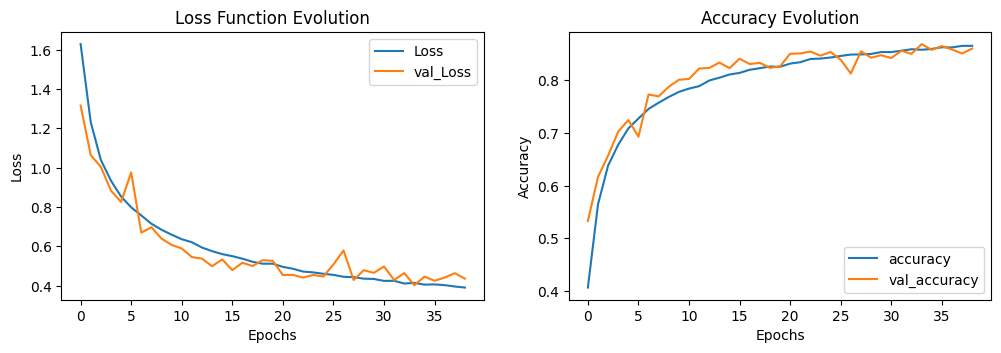

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))

# Plot for Loss
plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for Accuracy
plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Analysis of Training:
  
1.   Loss Function Evolution
**Initial Drop**: Both the training loss and validation loss decrease sharply at the beginning, which is typical as the model begins to learn from the data.      
  
**Convergence**: As the epochs increase, both the training and validation loss continue to decrease and start to converge. This suggests that the model is learning and generalizing well.  
  
**Stabilization**: After around 10 epochs, the decrease in loss slows down, and the curves begin to flatten out, indicating that the model's learning is stabilizing.  
  
**Validation Loss**: There are some fluctuations in the validation loss, but overall it remains close to the training loss, which is a good sign that the model is not overfitting.
  
2.   Accuracy Evolution
**Rapid Improvement**: There is a rapid increase in accuracy for both training and validation in the first few epochs.  
  
**Plateau**: After the initial increase, both accuracies plateau, with the validation accuracy slightly lagging behind the training accuracy, which is common in training processes.  
  
**Close Tracking**: The validation accuracy closely tracks the training accuracy throughout, which suggests that the model is generalizing well to unseen data.  
  
**No Overfitting Indication**: Since the validation accuracy does not diverge or drop significantly below the training accuracy, there is no clear sign of overfitting.


Although the training was set for **50 epochs**, it stopped at **39** due to the early_stopping_callback because of a lack of val_accuracy improvement.

# Evaluation



In [ ]:
test_loss, test_acc = model.evaluate(test_images, labels_cat_test, verbose=2)
print("test accuracy: ", test_acc)

313/313 - 2s - loss: 0.4356 - accuracy: 0.8603 - 2s/epoch - 5ms/step
test accuracy:  0.8603000044822693


Confusion Matrix

313/313 [==============================] - 1s 3ms/step


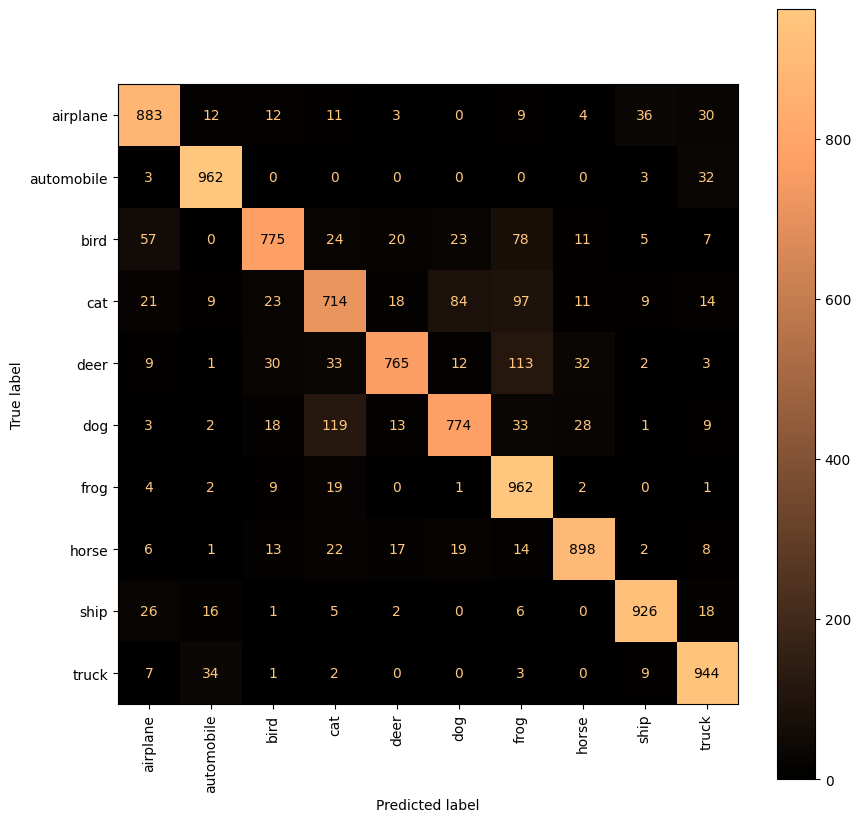

In [ ]:
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)
cm = confusion_matrix(test_labels, pred_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)


fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='copper')

plt.show()

Analysis of Evaluation:
  
The model yielded a test accuracy of **0.8603**.
  
Looking at the Confusion Matrix, **we can see that the correctly predicted images significantly outweight the incorrectly predicted images.**
  
*   **Diagonal Values**  
The diagonal elements of the matrix represent the number of correct predictions for each class. The model performs best at classifying 'automobile' and 'frog', with 962 predictions both, and performs least well at classifying 'cat', with only 714 correct predictions.

*   **Off-Diagonal Values**  
Off-diagonal elements show the number of misclassifications. For instance, the model often confuses 'cats' with 'dogs' (119 times) and 'deer' with 'frogs' (113 times), which might indicate similarities in features that the model captures for these classes.

Visualize Feature Maps

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)


0 conv2d_27
1 batch_normalization_27
2 conv2d_28
3 batch_normalization_28
4 max_pooling2d_13
5 dropout_18
6 conv2d_29
7 batch_normalization_29
8 conv2d_30
9 batch_normalization_30
10 max_pooling2d_14
11 dropout_19
12 conv2d_31
13 batch_normalization_31
14 conv2d_32
15 batch_normalization_32
16 max_pooling2d_15
17 dropout_20
18 flatten_5
19 dense_10
20 dropout_21
21 dense_11


In [ ]:
def get_feature_maps_model(model, layer_names):
    outputs = [model.get_layer(name).output for name in layer_names]
    return Model(inputs=model.inputs, outputs=outputs)

layer_names = ['conv2d_27', 'conv2d_28', 'conv2d_29', 'conv2d_30', 'conv2d_31', 'conv2d_32']

# Create the feature map model
feature_map_model = get_feature_maps_model(model, layer_names)

# Prepare an input image. This could be one of your test images.
input_img = test_images[0].reshape(1, 32, 32, 3)

# Get feature maps
feature_maps = feature_map_model.predict(input_img)

1/1 [==============================] - 0s 157ms/step


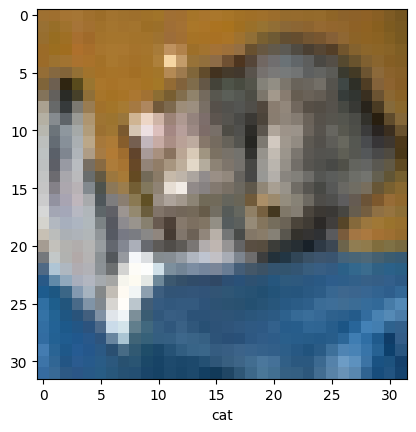

In [ ]:
# Visualize input image
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[0][0]])
plt.show()

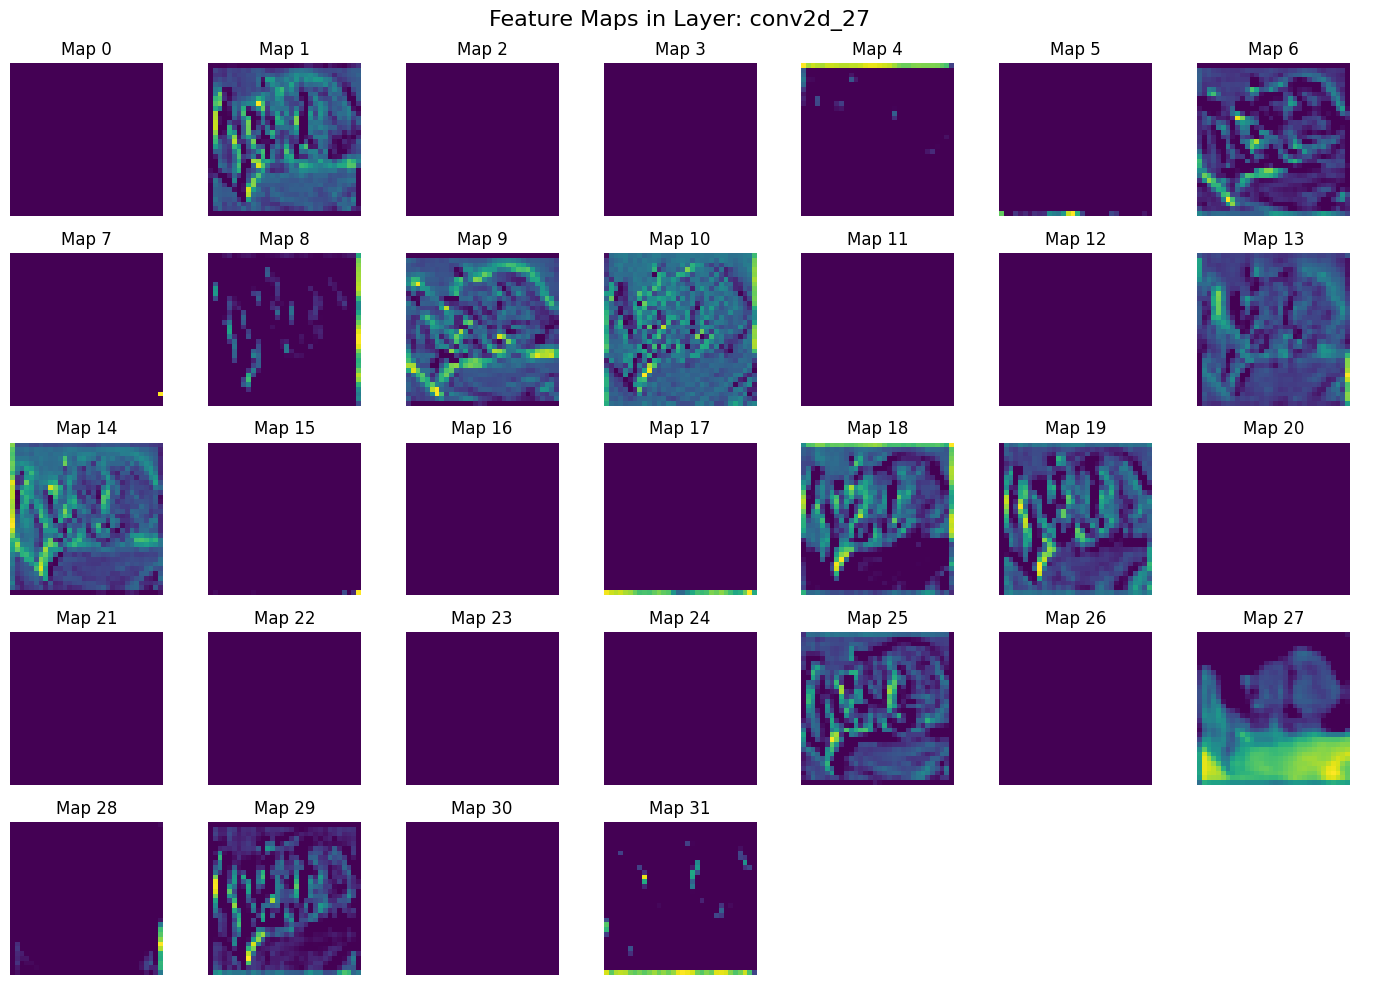

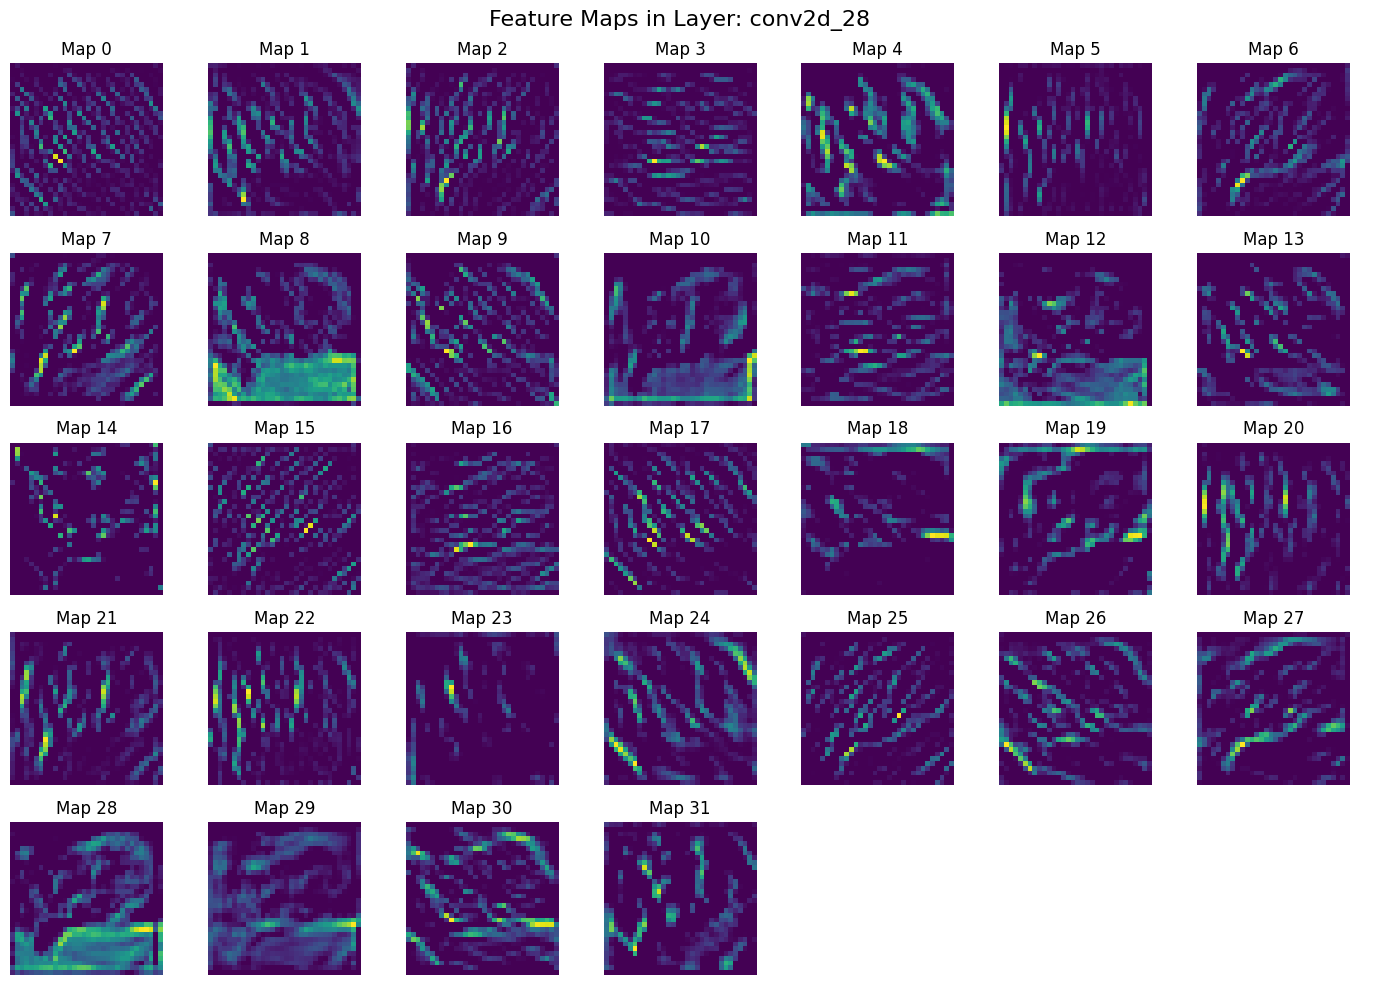

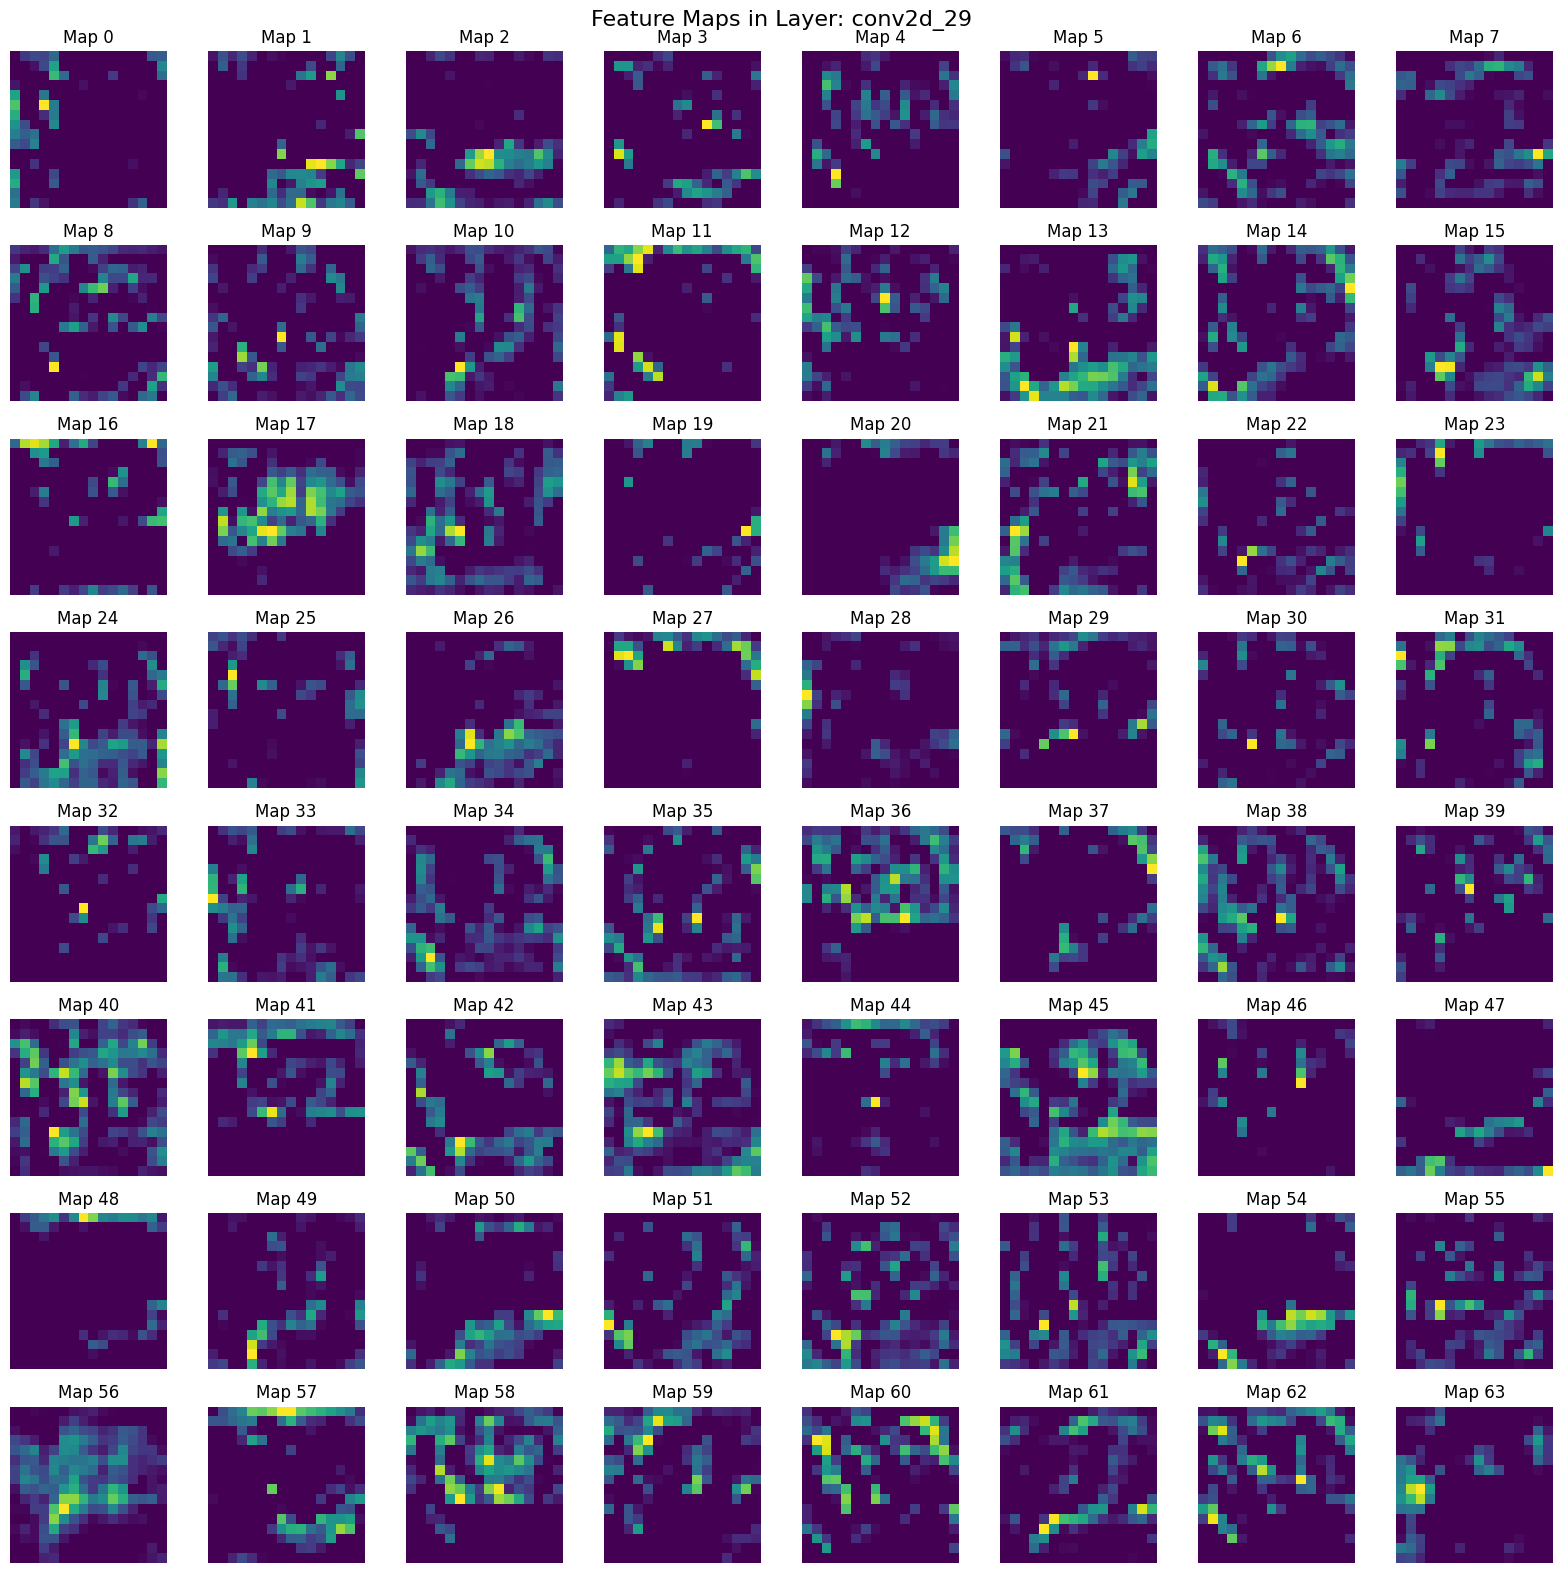

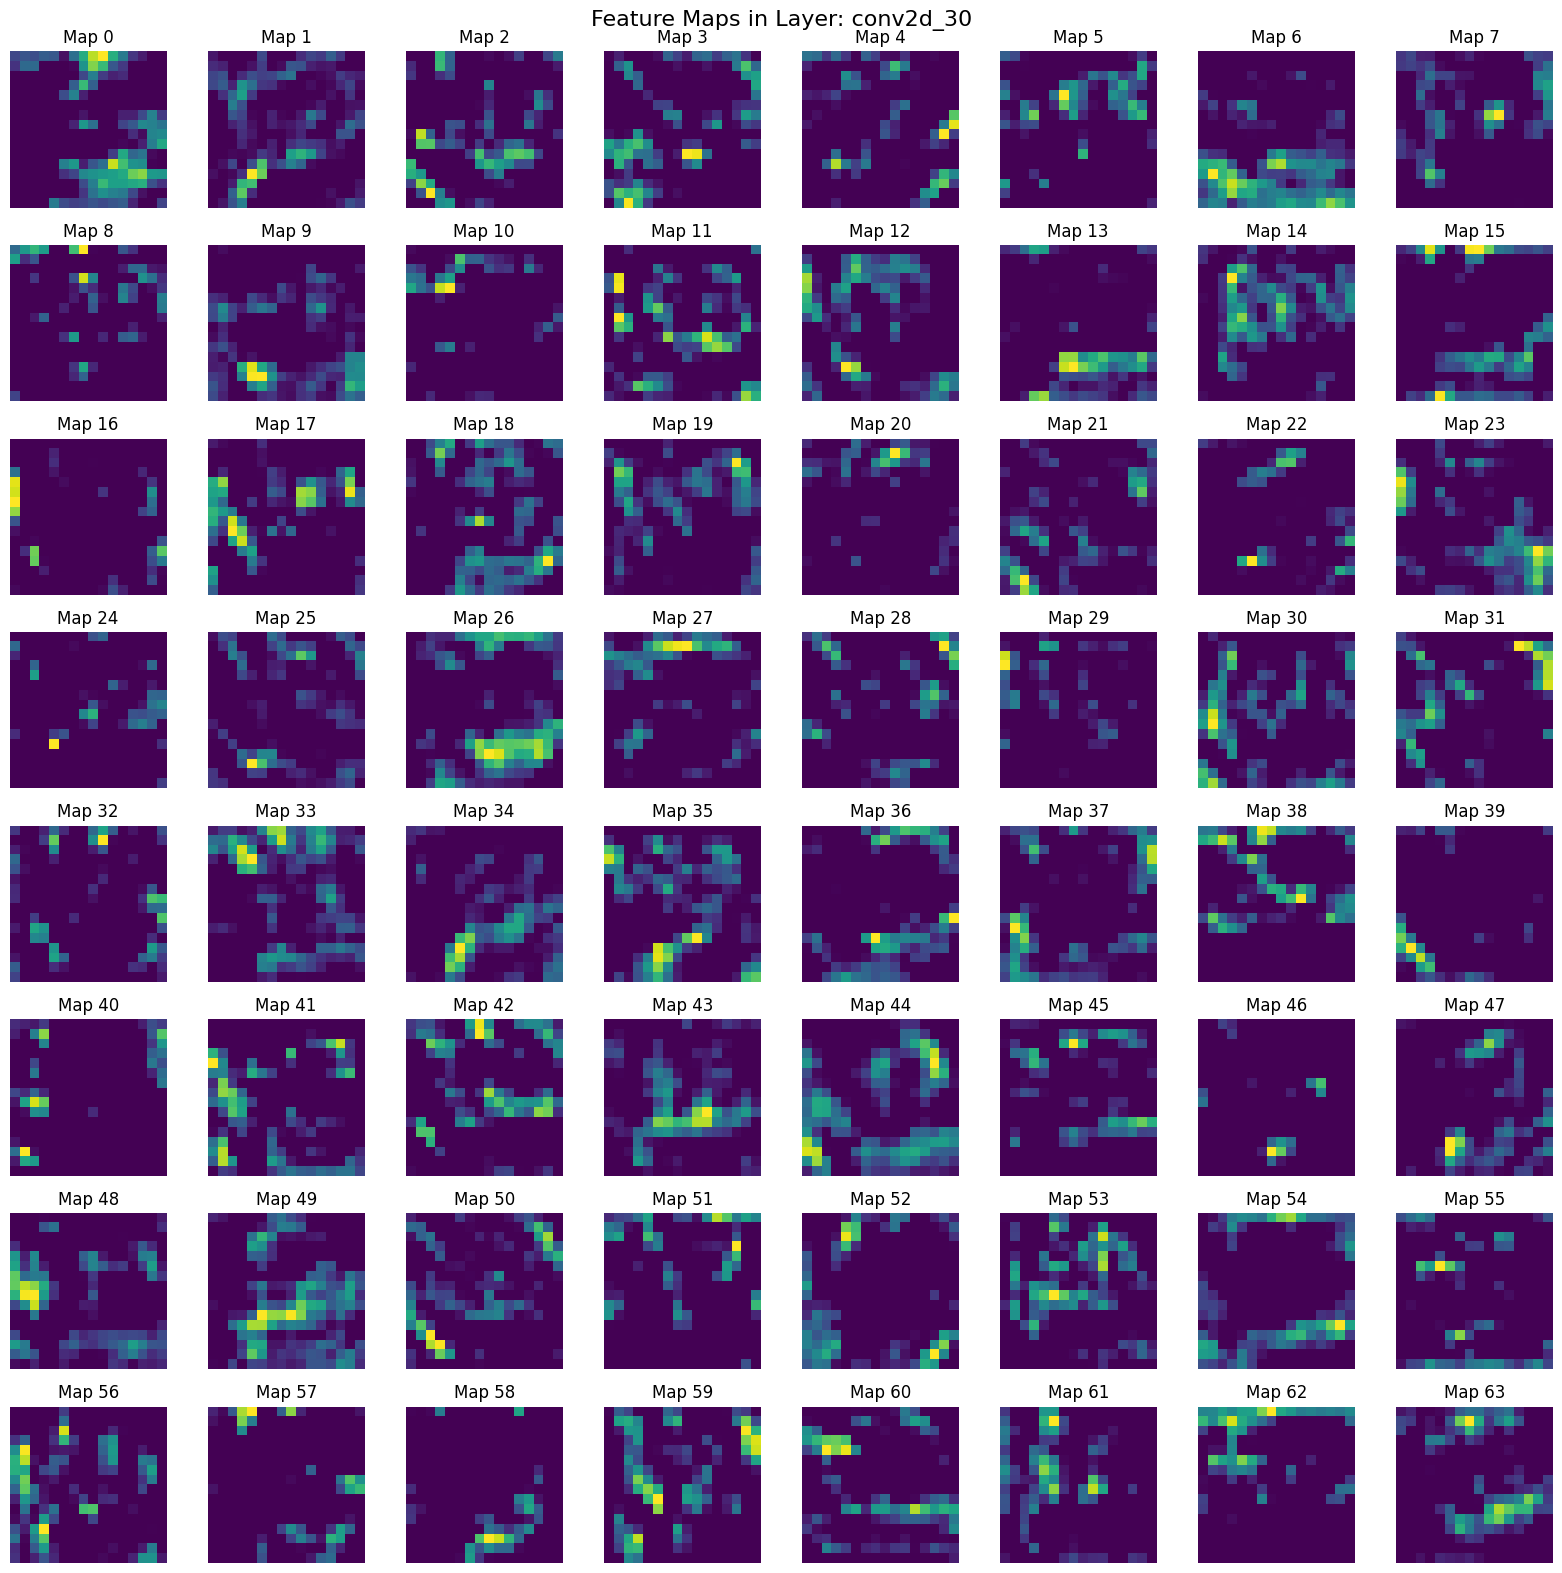

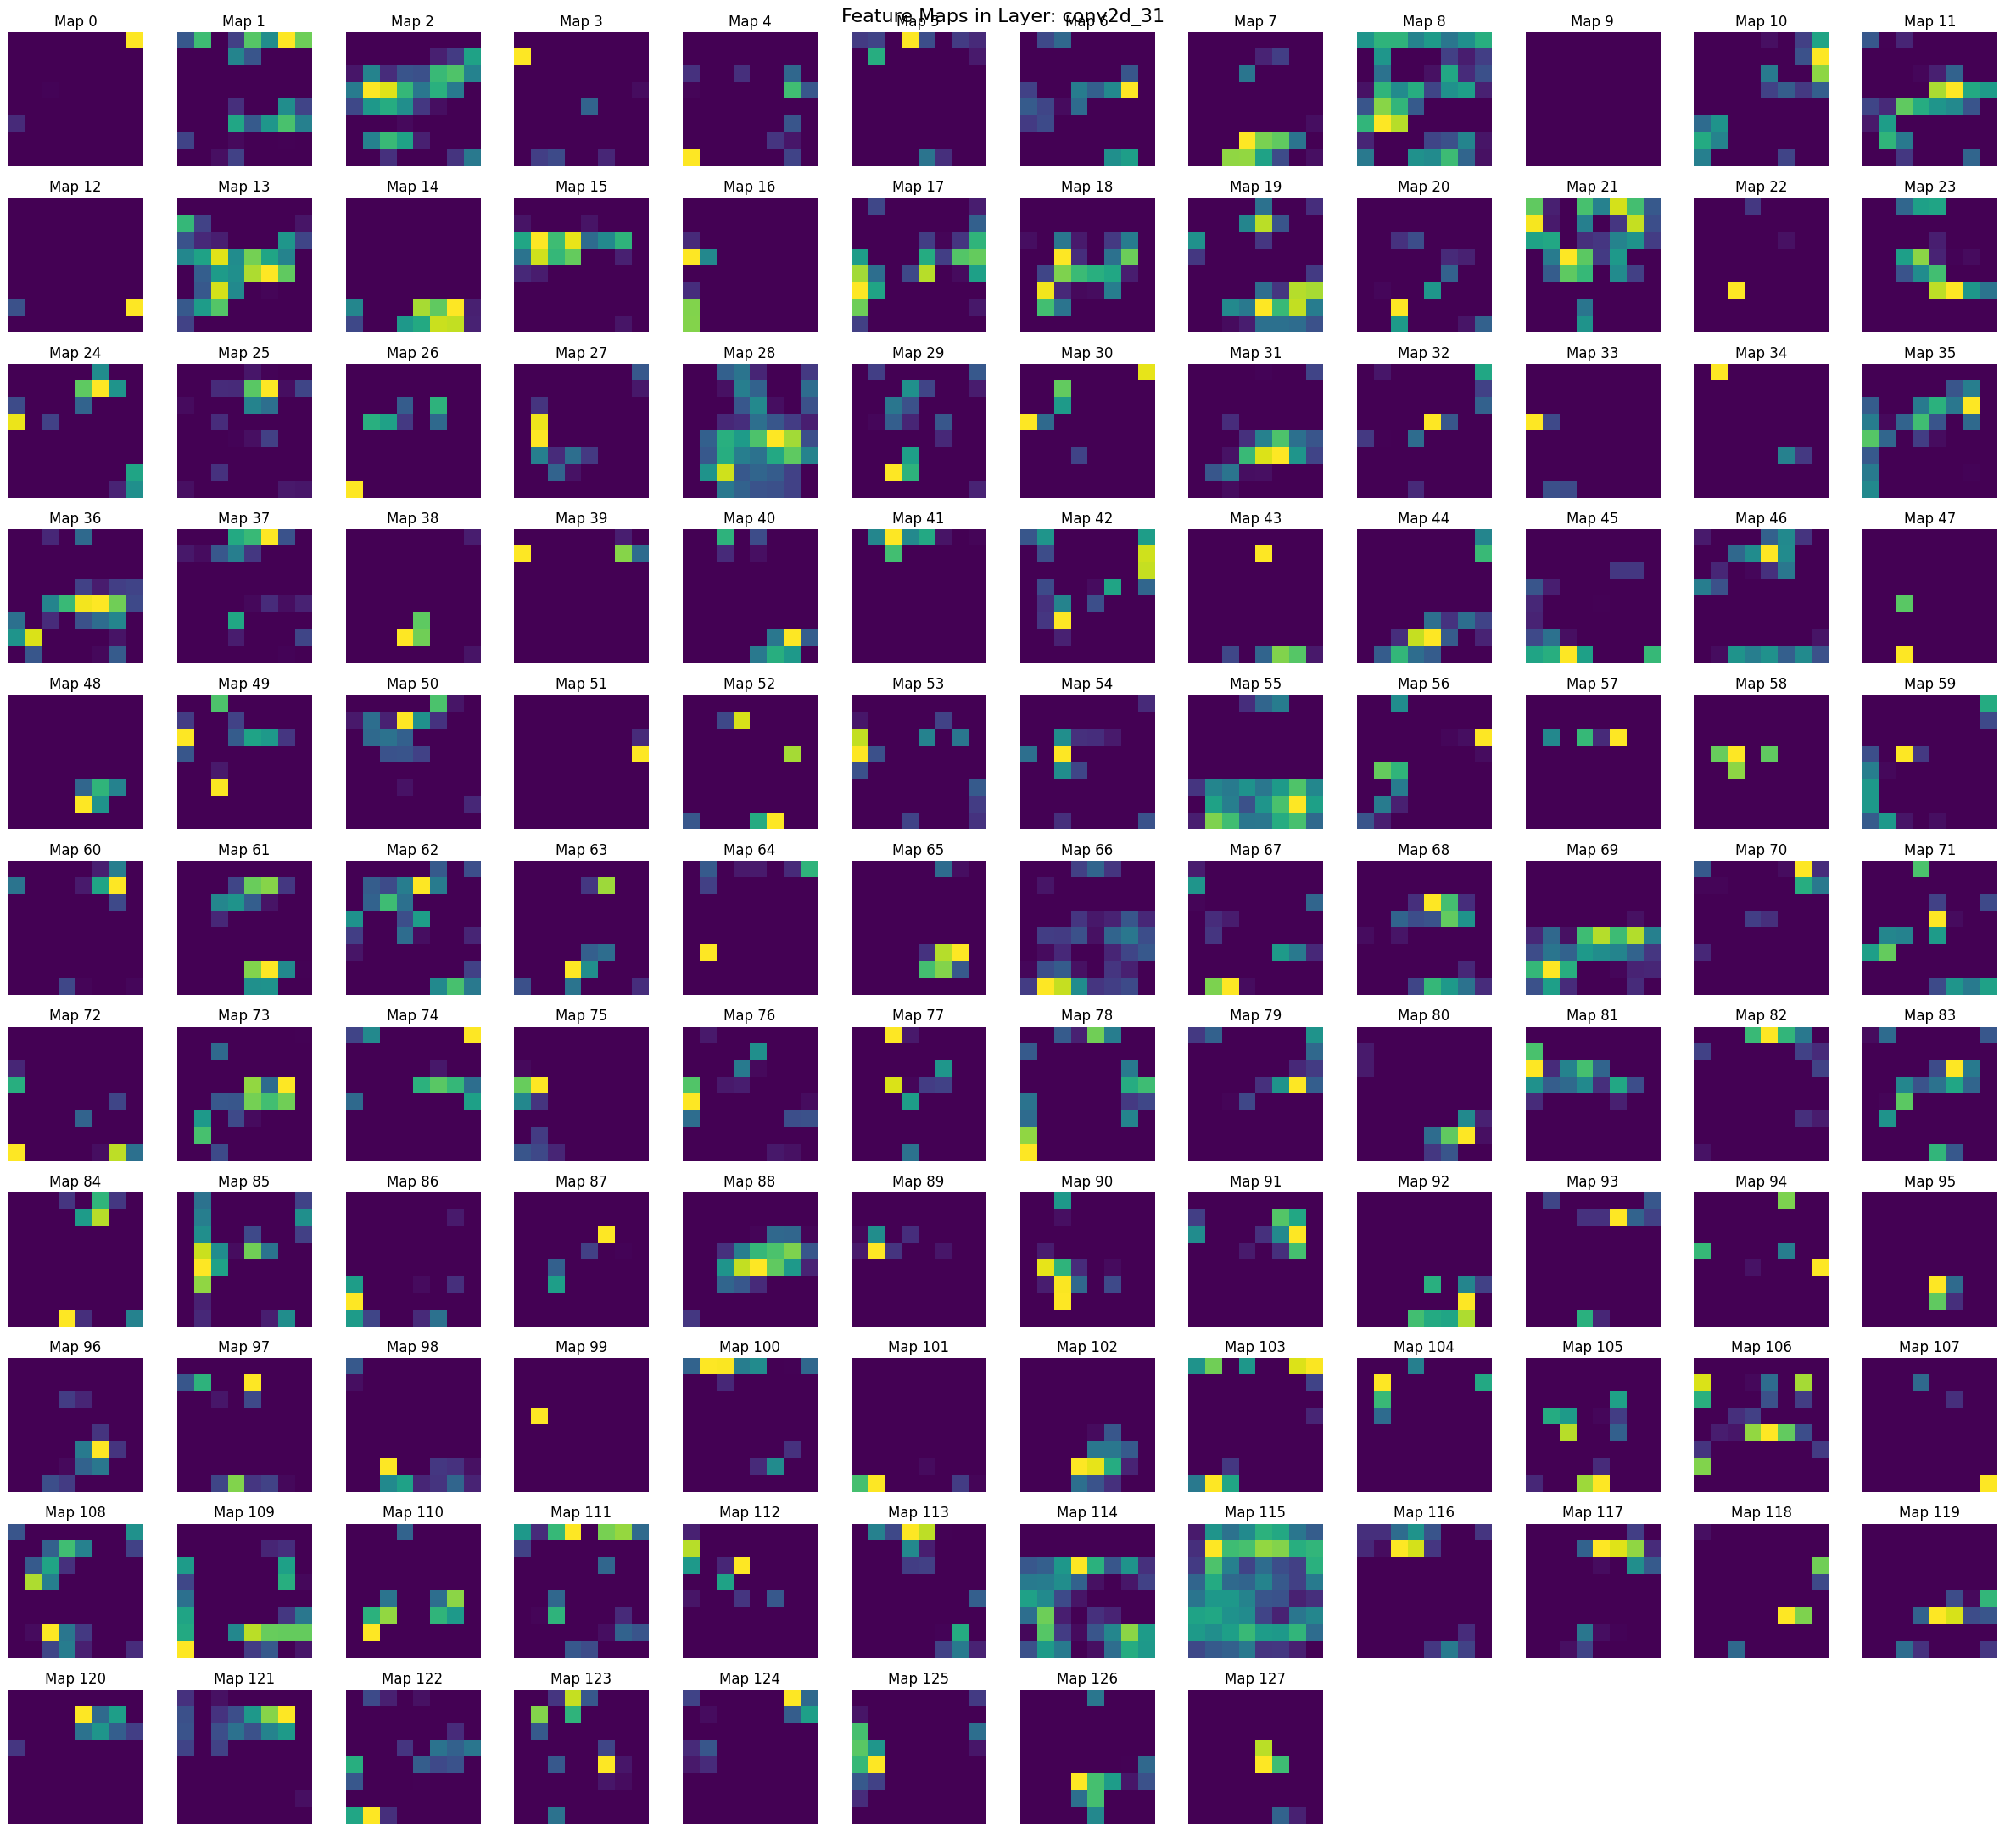

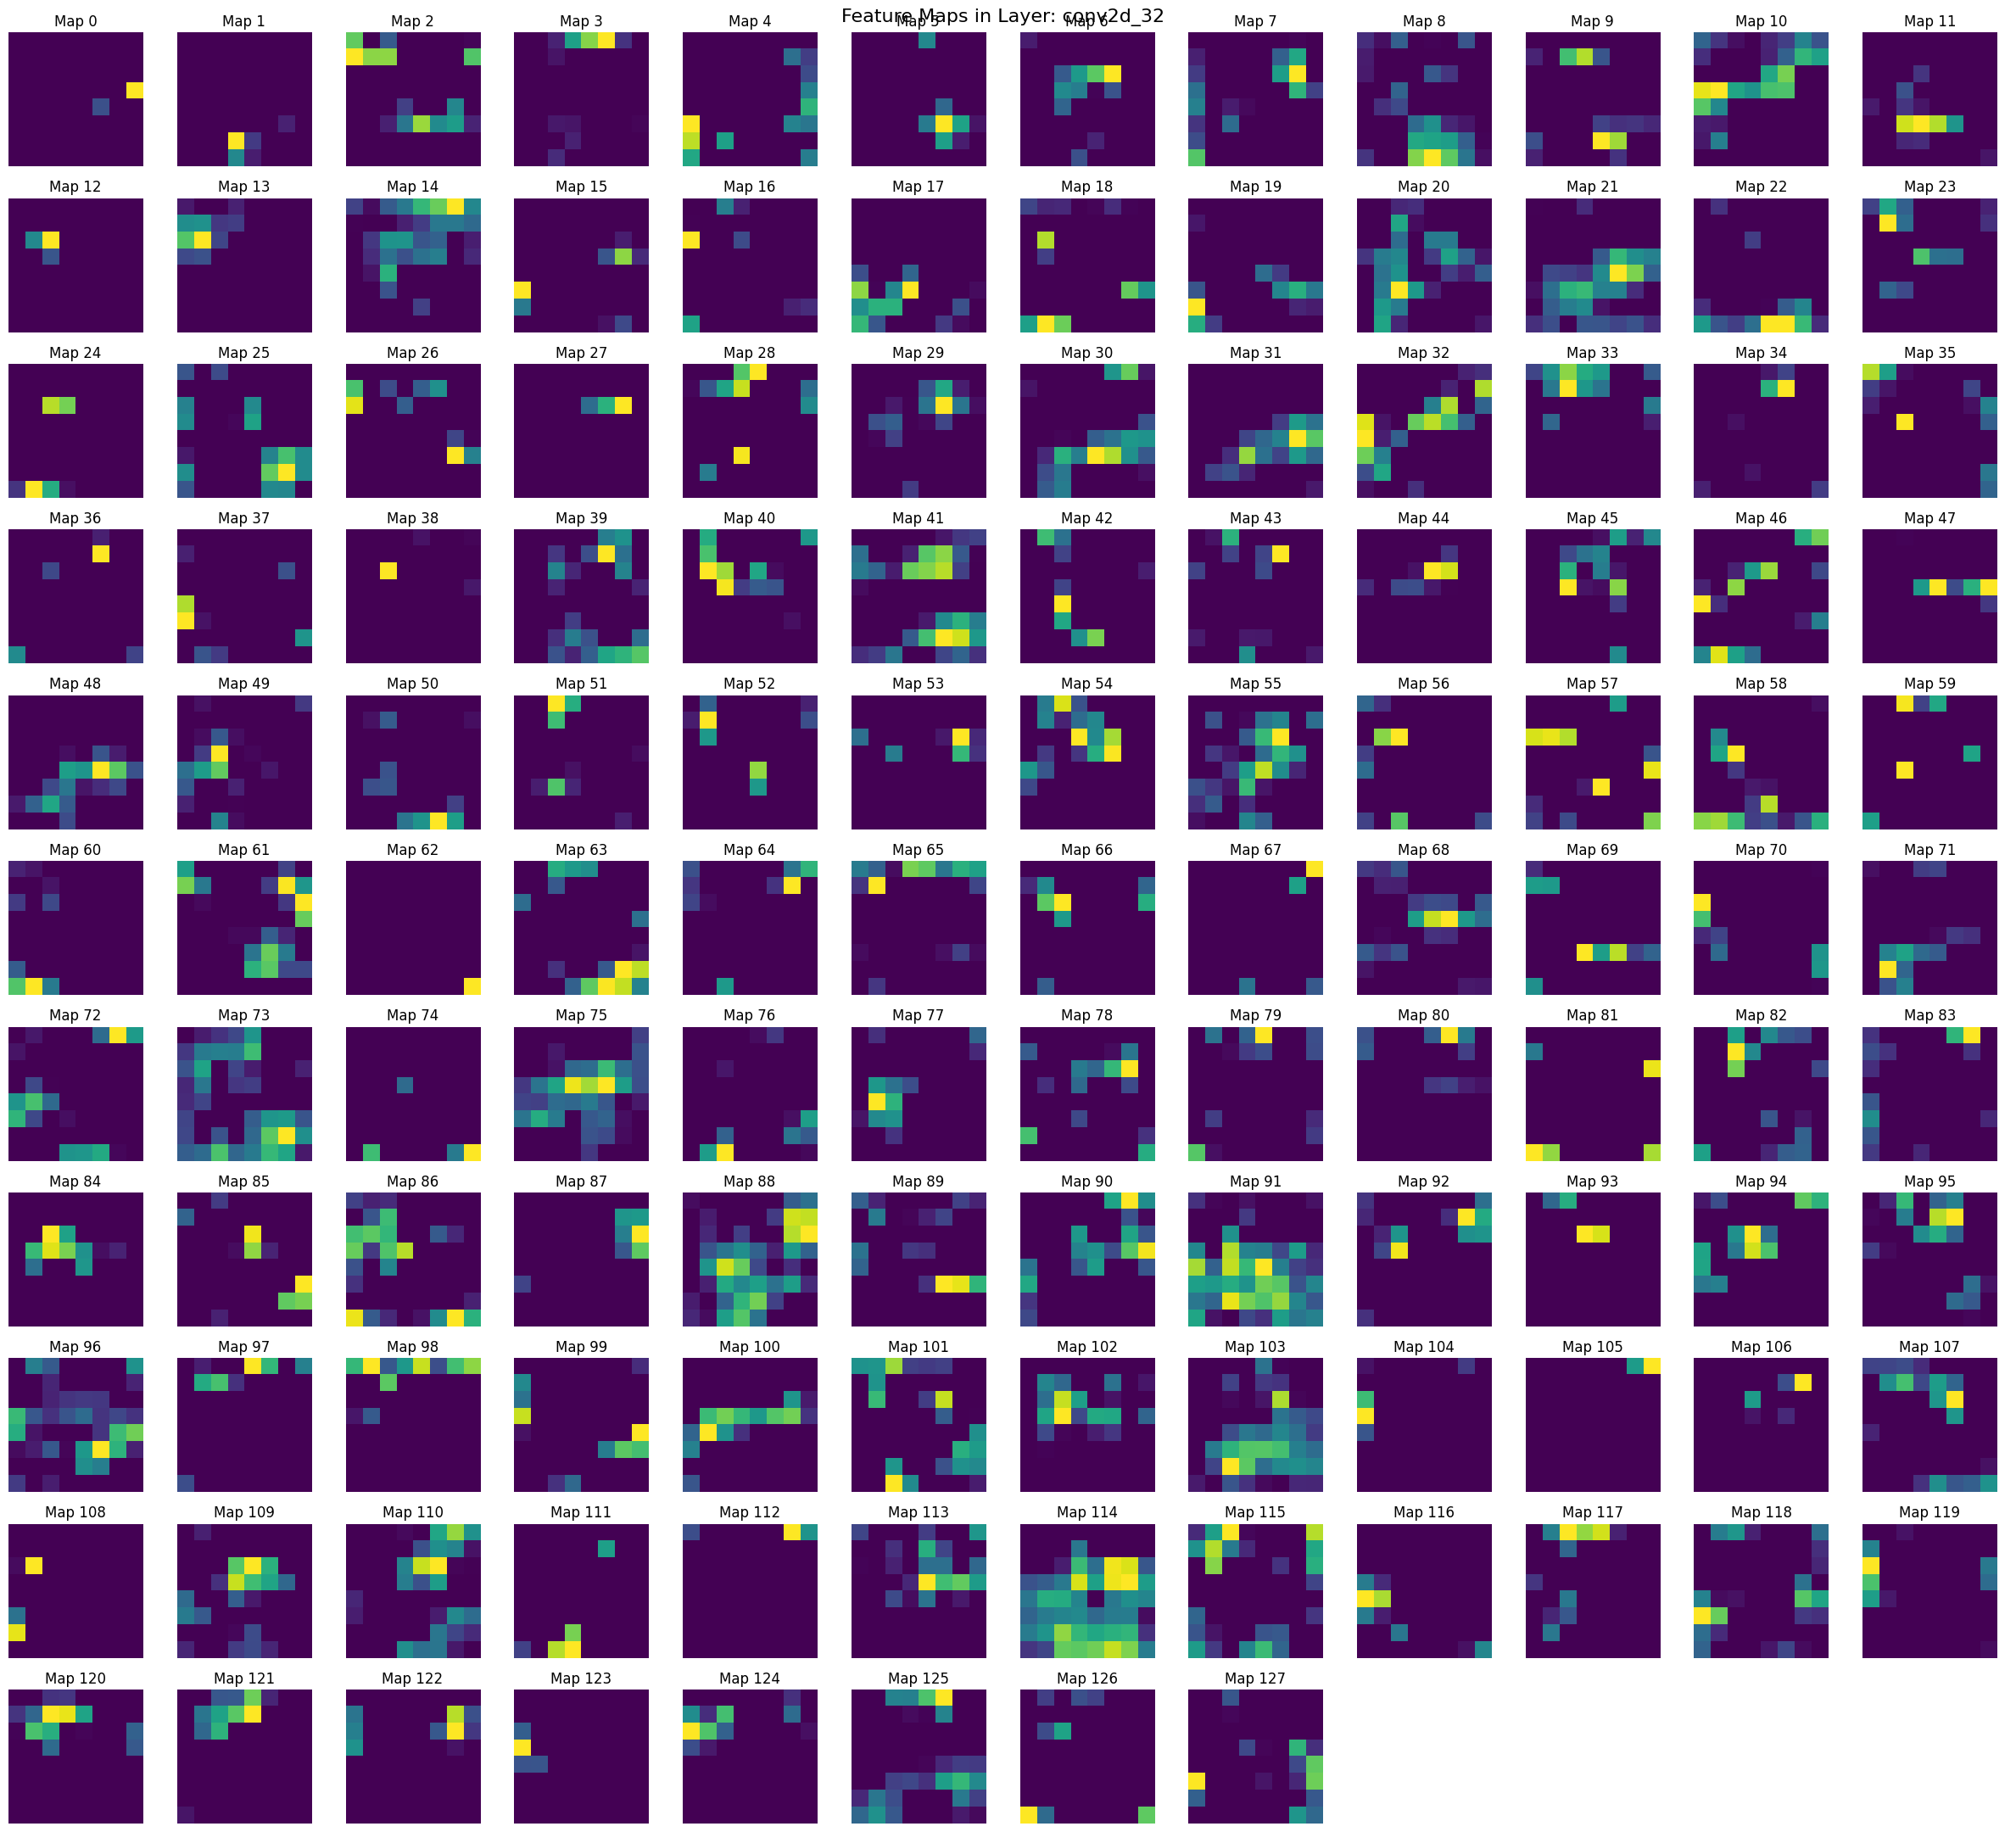

In [ ]:
# Plot feature maps
def plot_feature_maps(feature_maps, layer_names):
    # Number of feature maps in each layer
    num_maps_per_layer = [layer_maps.shape[-1] for layer_maps in feature_maps]

    for layer_index, layer_maps in enumerate(feature_maps):
        layer_name = layer_names[layer_index]
        num_maps = num_maps_per_layer[layer_index]

        # Set up the grid for plotting
        nrows = int(np.sqrt(num_maps))
        ncols = int(np.ceil(num_maps / nrows))

        fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
        fig.suptitle(f"Feature Maps in Layer: {layer_name}", fontsize=16)

        for i in range(nrows * ncols):
            ax = axes[i // ncols, i % ncols]

            # Only plot if there's a corresponding feature map
            if i < num_maps:
                ax.imshow(layer_maps[0, :, :, i], cmap='viridis')
                ax.set_title(f"Map {i}")
                ax.axis('off')
            else:
                ax.axis('off')

        plt.tight_layout()
        plt.show()

# Call the function with the obtained feature maps and layer names
plot_feature_maps(feature_maps, layer_names)

Feature Maps Analysis:  
In a convolutional neural network (CNN), the number of activation maps, also known as feature maps, is determined by the number of filters (or kernels) used in each convolutional layer. Each filter produces one feature map, so if a convolutional layer has **n** filters, it will produce **n** feature maps.
  
From the diagram of the model's architecture,  we can see the following convolutional layers with their respective output shapes, which include the number of feature maps:
  


1.   **conv2d_27**  
The output shape is (None,32,32,32). This means there are 32 feature maps of size 32x32.
2.   **conv2d_28**  
The output shape is (None,32,32,32). This indicates that this layer also uses 32 filters, maintaining the number of feature maps as 32.
2.   **conv2d_29**  
The output shape is
(None,16,16,64). Here, the number of feature maps has increased to 64, due to the layer having 64 filters. The spatial dimensions have decreased to 16x16, due to the preceding max pooling operation which downsamples the feature maps.
2.   **conv2d_30**  
The output shape is (None,16,16,64). This layer keeps the same number of filters as the previous layer, thus producing 64 feature maps.
2.   **conv2d_31**  
The output shape is (None,8,8,128). The number of feature maps is now 128, indicating this layer has 128 filters. Again, note the reduction in spatial dimensions to 8x8, which is due to another max pooling layer.
2.   **conv2d_32**  
The output shape is (None,8,8,128). This final convolutional layer also has 128 filters, so it outputs 128 feature maps.  

In the early stages of a convolutional neural network, the layers with a smaller number of feature maps, like 32, capture the basics of the input image — edges, colors, and general textures. These layers have a broad view, which helps in recognizing common patterns across different images. As the network analyzes the input image, these basic patterns are combined and processed by subsequent layers to form more detailed features.

Further down the network, where the layers have more feature maps, such as 128, the focus shifts to intricate details. Here, the network 'zooms in' on the specifics, picking up on the finer aspects that distinguish one image from another. The pooling layers that precede these deeper layers condense the information, allowing the network to focus on specific, high-level characteristics. This results in feature maps that show a more granular, pixel-like detail, highlighting the complex features that the network uses to make its final decisions.  

This is why, the further down we traverse the convolution layers, the more focused and zoomed in the feature maps are as shown above.